# Data Preprocessing

### Exploratory Data Analysis (EDA)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Dataset csv file read
df = pd.read_csv("/Users/hp/Desktop/F1-Dashboard/F1-Dashboard/Dataset/winners_f1_1950_2025_v2.csv")

# Show first 5 rows
df.head()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,5/13/1950,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,2:13:23,70,1950
1,5/21/1950,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,3:13:18,100,1950
2,5/30/1950,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,2:46:55,138,1950
3,6/4/1950,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,2:02:53,42,1950
4,6/18/1950,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,2:47:26,35,1950


In [3]:
# Dataset shape
df.shape

(1141, 9)

In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1141 non-null   object
 1   continent    1141 non-null   object
 2   grand_prix   1141 non-null   object
 3   circuit      1141 non-null   object
 4   winner_name  1141 non-null   object
 5   team         1141 non-null   object
 6   time         1141 non-null   object
 7   laps         1141 non-null   int64 
 8   year         1141 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 80.4+ KB


In [5]:
# Dataset types
df.dtypes

date           object
continent      object
grand_prix     object
circuit        object
winner_name    object
team           object
time           object
laps            int64
year            int64
dtype: object

In [ ]:
# Show missing values for each column
df.isnull().sum()

date           0
continent      0
grand_prix     0
circuit        0
winner_name    0
team           0
time           0
laps           0
year           0
dtype: int64

In [7]:
# Show basic statistics
df.describe(include="all")

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
count,1141,1141,1141,1141,1141,1141,1141,1141.000000,1141.000000
unique,1138,6,36,77,115,65,963,NaN,NaN
top,7/1/1951,Europe,Italy,Autodromo Nazionale di Monza,Lewis Hamilton,Ferrari,1:32:58,NaN,NaN
freq,2,686,82,75,105,249,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.646801,1992.985101
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.049208,20.853851
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1950.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,1977.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,1995.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.000000,2011.000000


In [8]:
# Dataset sample
df.sample()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
597,9/8/1996,Europe,Italy,Autodromo Nazionale di Monza,Michael Schumacher,Ferrari,1:17:43,53,1996


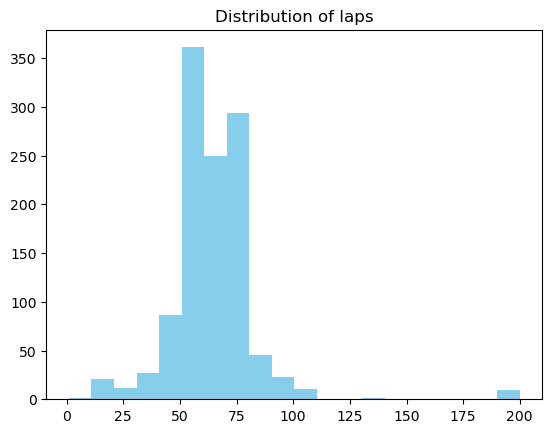

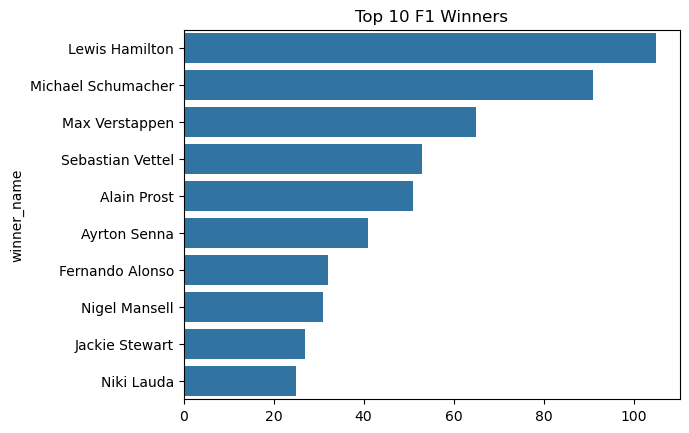

In [10]:
plt.hist(df["laps"], bins=20, color="skyblue")
plt.title("Distribution of laps")
plt.show()


top_winners = df["winner_name"].value_counts().head(10)
sns.barplot(x=top_winners.values, y=top_winners.index)
plt.title("Top 10 F1 Winners")
plt.show()

### Data Cleaning

In [20]:
# Clean the speces in columns names
for col in ['winner_name', 'team', 'grand_prix', 'circuit']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

df

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,5/13/1950,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,2:13:23,70,1950
1,5/21/1950,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,3:13:18,100,1950
2,5/30/1950,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,2:46:55,138,1950
3,6/4/1950,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,2:02:53,42,1950
4,6/18/1950,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,2:47:26,35,1950
...,...,...,...,...,...,...,...,...,...
1136,6/15/2025,North America,Canada,Circuit Gilles Villeneuve,George Russell,Mercedes,1:31:52,70,2025
1137,6/29/2025,Europe,Austria,Red Bull Ring,Lando Norris,McLaren,1:23:47,70,2025
1138,7/6/2025,Europe,Great Britain,Silverstone Circuit,Lando Norris,McLaren,1:37:15,52,2025
1139,7/27/2025,Europe,Belgium,Circuit de Spa Francorchamps,Oscar Piastri,McLaren,1:25:22,44,2025


In [21]:
# Fill Missing Values
df = df.fillna("Unknown")
df.isna().sum()

date           0
continent      0
grand_prix     0
circuit        0
winner_name    0
team           0
time           0
laps           0
year           0
dtype: int64

In [23]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [24]:
# Change data types
df[['year', 'laps']] = df[['year','laps']].astype('Int64')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df[['team', 'grand_prix','continent']] = df[['team', 'grand_prix','continent']].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1141 non-null   datetime64[ns]
 1   continent    1141 non-null   category      
 2   grand_prix   1141 non-null   category      
 3   circuit      1141 non-null   object        
 4   winner_name  1141 non-null   object        
 5   team         1141 non-null   category      
 6   time         1141 non-null   datetime64[ns]
 7   laps         1141 non-null   Int64         
 8   year         1141 non-null   Int64         
dtypes: Int64(2), category(3), datetime64[ns](2), object(2)
memory usage: 63.3+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_25144\4245516291.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')


In [25]:
# Rename columns names
df.rename(columns={'date': 'Date',
                   'continent': 'Continent',
                   'grand_prix' :'Grand-Prix',
                   'circuit' : 'Circuit',
                   'winner_name': 'Winner-Name',
                   'team': 'Team',
                   'time' :'Time',
                   'laps' : 'Laps',
                   'year': 'Year'}, inplace=True)

df.columns

Index(['Date', 'Continent', 'Grand-Prix', 'Circuit', 'Winner-Name', 'Team',
       'Time', 'Laps', 'Year'],
      dtype='object')

In [29]:
# Save cleaned dataset
df.to_csv("../Dataset/winners_f1_cleaned.csv", index=False)